# INTERACTIVE DATA SCIENCE
### Sachin Dabas | Somarth Gowda | Kevin Chian
### Carnegie Mellon University
### Helsinki - SanFrancisco Comparision - An Urban Study


### // HELSINKI; AN URBAN CASE STUDY ABOUT MOST FUNCTIONAL CITY IN THE WORLD
#### The City of Helsinki is attempting to increase levels of cycling in city traffic. The city bike system supports this goal. At first in the summer of 2016 there were 500 bikes in 50 locations around the city center. The area expanded in summer 2017 and currently there are 1,500 bikes and 150 bike stations in use. The city bike system will complement the services provided in areas where public transport is not an option.
#### City bikes are shared-use bicycles that can be borrowed for a fee by anyone in central Helsinki. Your chosen season pass (day, week, whole season) covers up to 30 minutes of bike use per time. For an extra charge, you can use a bike for a maximum of five hours at a time. After the ride, the bike is returned to a bike station. For more information and registration please visit the city bikes' website: hsl.fi/en/citybikes

# // RESEARCH QUESTION:
#### 01: Comparison of two different cities that share the same bike system
#### 02: Identify the Urban attractors in the city based on transportation 

### // DESCRIPTION OF GOALS OF PROJECTS
* The goal of the project is to analyze the hidden layers of data among the daily travel of cyclists in the city of helsinki and San Francisco. In order to do so, the various relationships are identified and ploted to understand how cyclists travel in the both the cities. 

* 01: Location vs Hour relationship:
The 300 return locations in the city of the helsinki and San Francisco is a vital urban center that can tell us what features of urban space are people most excited about and how are they using it. It is also vital to understand what time of the day are these centers most active? The colored visualizations clearly shows the amount of business at particular hour of each station.

* 02: distance(m) vs month relationship
the data about cyclists on weekdays vs weekends. 

* 03: year vs distance(m) relationship
In order to understand how the cycling system has evolved through the years, (starting 2016)

# DATASET

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

print("imports ok")

imports ok


## LOAD DATA

In [2]:
# You might need to make adjustments in your drive for this to work, I made a shortcut in gdrive for this folder.
df = pd.read_csv(r"./data/helsinki/database.csv", encoding="ISO-8859-1")
df

C:\Users\chian\anaconda3\envs\ids\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ï»¿departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168610,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,KorppaanmÃ¤entie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,LÃ¤nsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661,0.4
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,SÃ¶rnÃ¤inen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980,0.4
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638,0.4
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168610,24.930537,0.4


## CLEAN DATA

In [3]:
#rename columns to remove spaces
df.rename(
    columns={
        'return': 'arrive',
        'ï»¿departure': 'departure',
        'avg_speed (km/h)': 'avg_speed', 
        'distance (m)': 'distance',
        'duration (sec.)': 'duration',
        'Air temperature (degC)': 'temperature'},  
    inplace=True
)

In [145]:
# change dtype of Time column 
df['arrive'] = pd.to_datetime(df.arrive, format='%Y-%m-%d %H:%M:%S')
# add month column
df['month'] = df.arrive.dt.month
# add year column
df['year'] = df.arrive.dt.year
# add weekday
df['weekday'] = df.arrive.dt.day_name()
df['return_name'].value_counts() # count values
df['duration'] = (df['duration']/60)
# for maps to see the frequency of cyclists
df['hour'] = df.arrive.dt.hour 
# convert from km/hr to m/hr
df["avg_speed"] = (df["avg_speed"]*1000) 

In [5]:
df = df[df['avg_speed'] < 50000] 
# remove values more than 5 hrs / the max usage for our dataset
df = df[df['duration'] <= 18000] 
# remove values where travelled distance is less than 0 or more than a marathon (180 KM)
df = df[df['distance'].between(0, 200000)]

We used pandas_profiling to help us get an idea of our data quality post-processing. Not including the run in the end notebook because it's clunky.

## SHOW DATA

Joint distribution of the departure latitudes and longitudes. This is, in effect, showing us how clustered the departure stations are in the city. It's interesting to note that you can infer the city center and see the stations slowly taper off in the histograms.

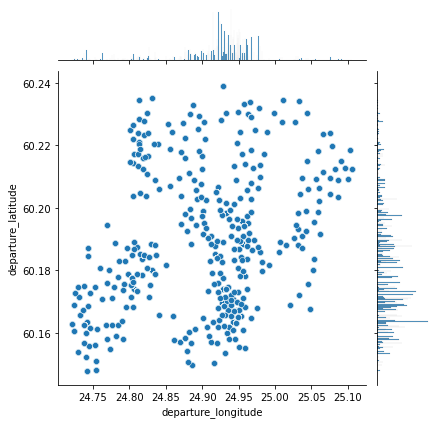

In [6]:
ax = sns.jointplot(data=df, x="departure_longitude", y="departure_latitude");

I found some road map data from 2015. It helps us get a context for how crowded / busy some areas are, and lets us see where downtown might be. https://www.avoindata.fi/data/en_GB/dataset/helsingin-liikennevaylat/resource/a678f192-871d-486d-b45b-32a3a343f85a

Their README is in Finnish, but a translation notes that they'd like accrediation:  
© Kaupunkimittaus, Helsinki 2015

In [75]:
road_gdf = gpd.read_file("./data/helsinki/Helsinki_liikennevaylat_avoin_data/Shape", crs="ETRS-GK25")
road_gdf = road_gdf.to_crs("EPSG:4326")

In [77]:
departure_stations = pd.DataFrame({'count' : df.groupby( [ "departure_longitude", "departure_latitude"] ).size()}).reset_index()

In [87]:
departure_gdf = gpd.GeoDataFrame(departure_stations,
                                 geometry=gpd.points_from_xy(departure_stations["departure_longitude"],
                                                             departure_stations["departure_latitude"]),
                                )

In [97]:
# normalize count to values between 0 and 1
departure_gdf["count"] = ((departure_gdf["count"] - departure_gdf["count"].min()) /
                        (departure_gdf["count"].max()- departure_gdf["count"].min()))

<AxesSubplot:>

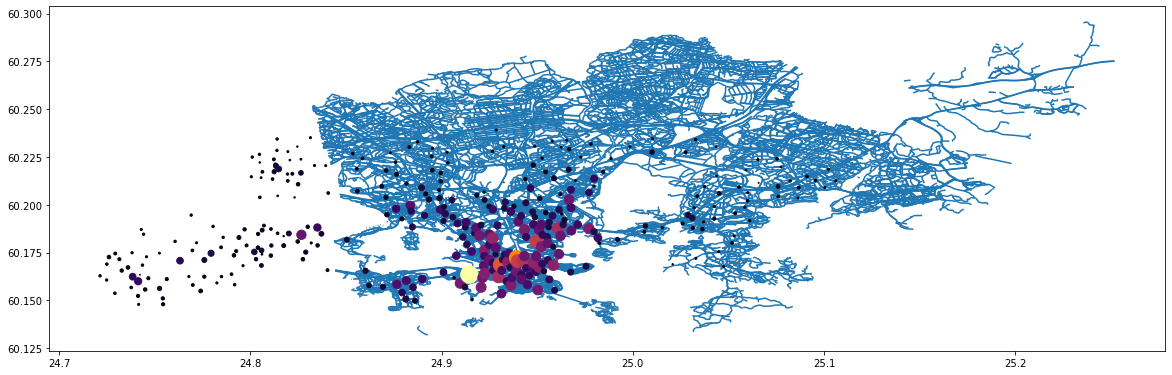

In [113]:
# fig, ax = plt.subplots(figsize=(10,40))
ax = road_gdf.plot(figsize=(20,20))
departure_gdf.plot(column="count", ax=ax, cmap='inferno', zorder=3, markersize=departure_gdf["count"]*300)
# sns.scatterplot(data=df, x="departure_longitude", y="departure_latitude", ax=ax)

You can see there are stations that extend beyond the map (telling in and of itself about how the city may have developed). More importantly, you can see how the city center is really the focal point of the activity as expected. You can also see the stations begin to form lines.

In [111]:
pop_gdf = gpd.read_file("./data/helsinki/Vaestotietoruudukko_2020_shp/Vaestotietoruudukko_2020.shp")
pop_gdf = pop_gdf.to_crs("EPSG:4326")

In [116]:
pop_gdf

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,703,5,51.0,99,99,99,99,99,99,99,99,99,"POLYGON ((24.50287 60.28562, 24.50284 60.28787..."
1,710,8,44.0,99,99,99,99,99,99,99,99,99,"POLYGON ((24.50311 60.26992, 24.50308 60.27216..."
2,711,5,90.0,99,99,99,99,99,99,99,99,99,"POLYGON ((24.50315 60.26767, 24.50311 60.26992..."
3,715,13,34.0,99,99,99,99,99,99,99,99,99,"POLYGON ((24.50328 60.25870, 24.50325 60.26094..."
4,848,5,53.0,99,99,99,99,99,99,99,99,99,"POLYGON ((24.50682 60.32378, 24.50678 60.32603..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,27108,7,70.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25.23954 60.28858, 25.23956 60.29082..."
5833,27109,6,38.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25.23953 60.28634, 25.23954 60.28858..."
5834,27110,14,23.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25.23951 60.28409, 25.23953 60.28634..."
5835,27111,12,59.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25.23950 60.28185, 25.23951 60.28409..."


C:\Users\chian\anaconda3\envs\ids\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

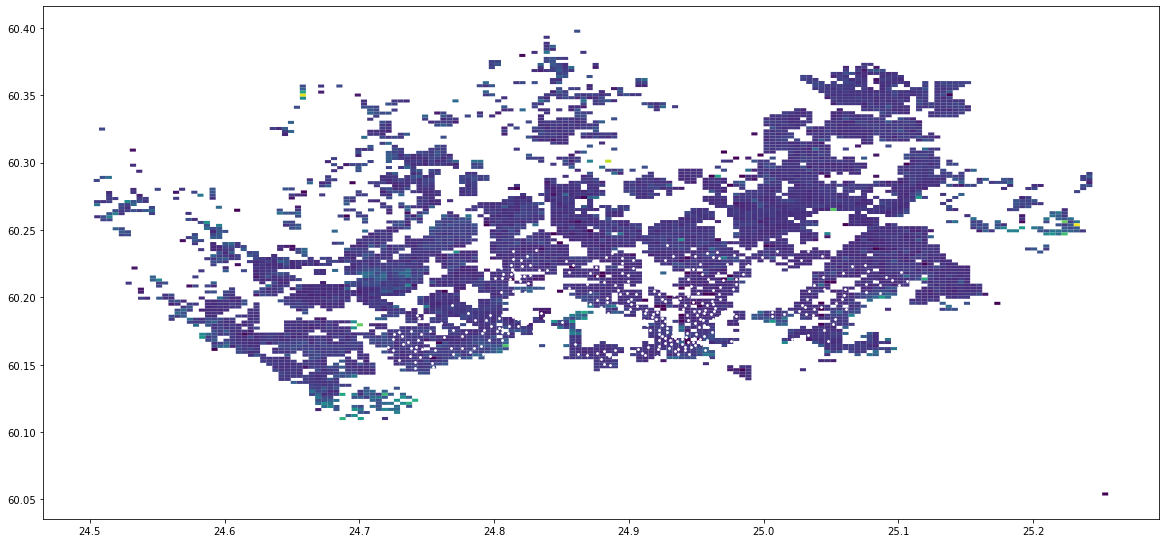

In [123]:
ax = pop_gdf.plot(column="ASVALJYYS" ,figsize=(20,20))
departure_gdf.plot(column="count", ax=ax, color='white', zorder=3, markersize=3)

This is just the tip of the iceberg for maps. What's cool about this part of the EDA is we begin to see a pattern for a faraway city in terms of its development, population, and planning. We also see the bikeshare stations at work.

Let's switch gears and look at how trips correlate by time / weather. These are standard visualizations for most datasets.

Text(0, 0.5, 'temperature(C)')

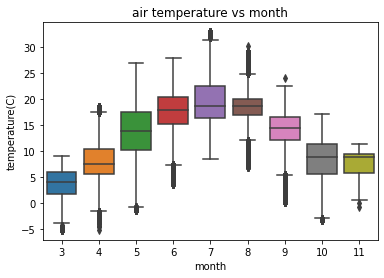

In [129]:
sns.boxplot(data=df, x=df["month"], y=df["temperature"])
plt.title("air temperature vs month")
plt.ylabel("temperature(C)")

It's important to note that there is no data for February - December even though the data spans ~3 years. Evidently, Finnish winter is too cold!

Text(0.5, 1.0, 'count of rides vs month')

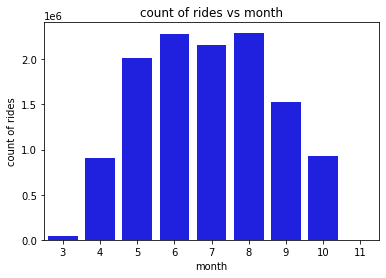

In [143]:
cnt = df.groupby("month").size().reset_index()
sns.barplot(data=cnt, x=cnt["month"], y=cnt[0], color="b");
plt.ylabel("count of rides")
plt.title("count of rides vs month")
# print(cnt)

Text(0.5, 1.0, 'count of rides vs hour')

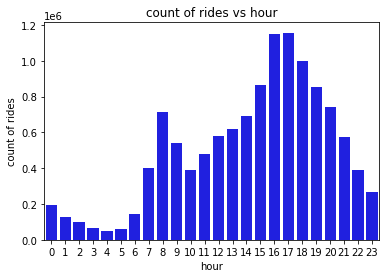

In [146]:
cnt = df.groupby("hour").size().reset_index()
sns.barplot(data=cnt, x=cnt["hour"], y=cnt[0], color="b");
plt.ylabel("count of rides")
plt.title("count of rides vs hour")
# print(cnt)

So as anticipated, you see most bike traffic happen in the summer, during the midday / afternoon. The morning has a spike, likely due to the initial commute. This is a question that might be worth exploring more in the final report.

[None]

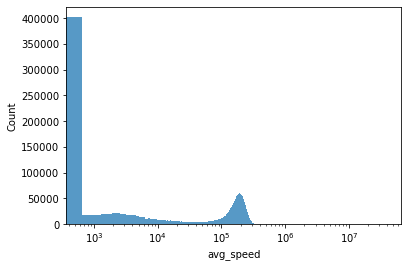

In [151]:
ax = sns.histplot(df["avg_speed"])
ax.set(xscale="log")

Interesting plot here, and hard to interpret given the log x scale, but almost necessary given the odd distribution of the data for average speed. You can see that there's a pretty common "average travelling speed" at around 62 miles per hour. This may be transporting bikes from place to place, or some other error that must be accounted for. Then, there's also a lot of instances where speed is really a tiny number, and this may be a result of keeping a rental bike rented while doing something else. 

In [161]:
df[df["avg_speed"] > 10**5].sample(5)

,departure,arrive,departure_id,departure_name,return_id,return_name,distance,duration,avg_speed,departure_latitude,departure_longitude,return_latitude,return_longitude,temperature,month,year,weekday,Hour,hour
3079257,2020-10-23 17:48:22,2020-10-23 17:55:37,22,Rautatientori / lÃ¤nsi,162.0,LeppÃ¤suonaukio,1088.0,0.120000,151111.111111,60.170606,24.939760,60.169573,24.926590,6.8,10,2020,Friday,17,17
1317192,2020-06-26 22:43:15,2020-06-26 22:57:02,272,Marjaniementie,282.0,Karhulantie,2444.0,0.228333,178394.160584,60.204325,25.076069,60.218601,25.102325,21.9,6,2020,Friday,22,22
10433182,2016-08-24 11:23:00,2016-08-24 11:33:00,A10,Erottajan aukio,A33,TÃ¶Ã¶lÃ¶nkatu,1482.0,0.166667,148200.000000,60.166890,24.944261,60.177560,24.928327,14.9,8,2016,Wednesday,11,11
6390734,2019-09-11 08:27:35,2019-09-11 08:31:49,539,"Aalto-yliopisto (M), Tietotie",549.0,Maarinranta,810.0,0.069167,195180.722892,60.184987,24.820099,60.187347,24.810753,16.7,9,2019,Wednesday,8,8
5417033,2019-07-27 19:38:42,2019-07-27 19:54:47,5,SepÃ¤nkatu,16.0,Liisanpuistikko,4508.0,0.267500,280872.274143,60.157948,24.936285,60.174182,24.961375,27.5,7,2019,Saturday,19,19


In [156]:
(df["avg_speed"] > 10**5).sum()

10677461

In [166]:
print(f"{df[df['avg_speed'] > 10**5]['duration'].mean()} average duration for speed > 10^5")
print(f"{df[df['avg_speed'] > 10**5]['duration'].max()} max duration for speed > 10^5")

print(f"{df[df['avg_speed'] <= 10**5]['duration'].mean()} average duration for speed <= 10^5")
print(f"{df[df['avg_speed'] <= 10**5]['duration'].max()} average duration for speed <= 10^5")

0.19770962625022598 average duration for speed > 10^5
13.550833333333333 max duration for speed > 10^5
0.7392175043032554 average duration for speed <= 10^5
296.61944444444447 average duration for speed <= 10^5


Text(0.5, 1.0, 'Duration vs Speed for suspected outliers')

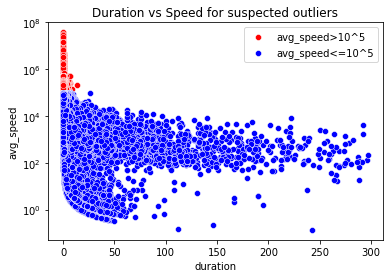

In [168]:
toofast = df[df['avg_speed'] > 10**5]
slow = df[df['avg_speed'] <= 10**5]
ax = sns.scatterplot(data=toofast, color="r", x=toofast["duration"], y=toofast["avg_speed"], label="avg_speed>10^5")
sns.scatterplot(data=slow, color="b", x=slow["duration"], y=slow["avg_speed"], ax=ax, label="avg_speed<=10^5")
ax.set(yscale="log")
plt.title("Duration vs Speed for suspected outliers")

Based on these visualizations, it makes sense to me that we remove rows with a minimum amount of duration. It's not fully impossible to average 62 miles per hour on a bike, but it's certainly hard to imagine. The red's concentration towards the left is a sign to me that small durations cannot be trusted, at the very least.

In [170]:
df = df[df['duration'] > 1]

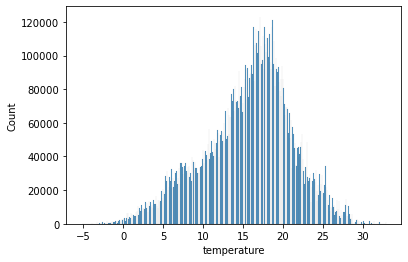

In [157]:
ax = sns.histplot(df["temperature"])

There's a pretty nice curve for temperature, about 17 degrees Celsius seems to be approximately where everyone wants to ride their bike.